## Trying to see how price affects sales

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
DIRECTORY = './data/'
calendar = pd.read_csv(DIRECTORY + 'calendar.csv', parse_dates=['date'])
train_validation = pd.read_csv(DIRECTORY + 'sales_train_validation.csv')
train_evaluation = pd.read_csv(DIRECTORY + 'sales_train_evaluation.csv')
prices = pd.read_csv(DIRECTORY + 'sell_prices.csv')

In [ ]:
# # How does price affect sales?
# col_wise = train_validation.copy()
# col_wise['id'], _ = pd.factorize(col_wise['id'])
# col_wise = col_wise.drop(columns=col_wise.select_dtypes('object').columns)
# col_wise = col_wise.rename(columns={col : int(col.split('_')[1]) for col in col_wise.columns if 'd_' in col})
# col_wise = col_wise.melt(id_vars='id', var_name='day', value_name='sales')

In [64]:
train_validation.nunique()

id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
            ...  
d_1909         53
d_1910         57
d_1911         61
d_1912         73
d_1913         65
Length: 1919, dtype: int64

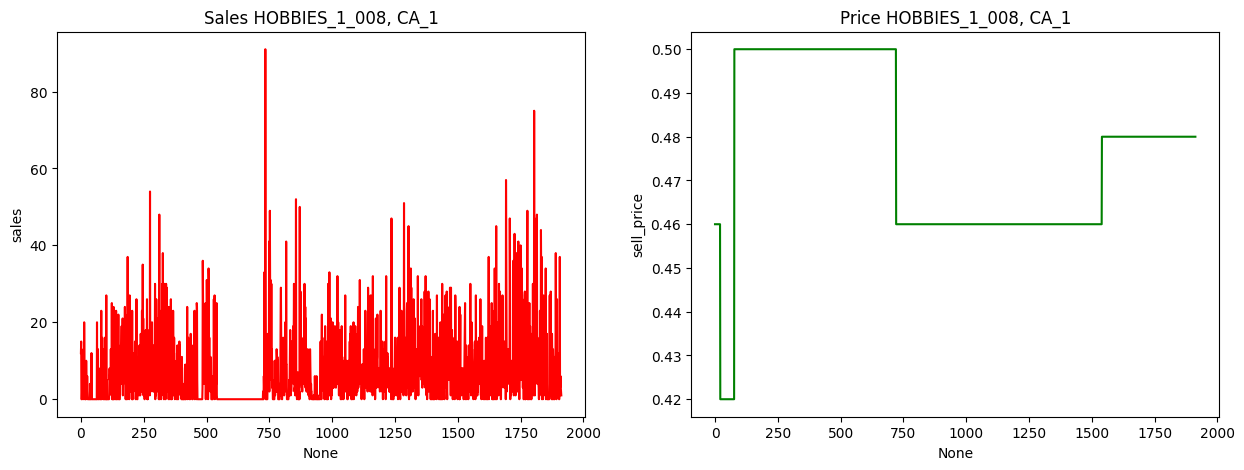

In [67]:
# Sample random ITEM - STORE combos, look at price
ids = random.choices(train_validation['id'].unique(), k=5)
ids = ['HOBBIES_1_008_CA_1_validation']

ncols = 2
nrows = len(ids)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,nrows*5))
axs = axs.flatten()

for i, id in enumerate(ids):
    # get info about id
    row = train_validation[train_validation['id'] == id]
    item_id = row['item_id'].values[0]
    store_id = row['store_id'].values[0]

    # set up sales df
    sales = train_validation[train_validation['id'] == id].select_dtypes('number').T
    sales.columns = ['sales']
    sales['sales'] = sales['sales'].astype(int)
    sales = sales.merge(calendar[['d', 'wm_yr_wk']], how='left', left_index=True, right_on='d')

    filtered_prices = prices[(prices['item_id'] == item_id) & (prices['store_id'] == store_id)]
    sales = sales.merge(filtered_prices[['wm_yr_wk', 'sell_price']], how='left', on='wm_yr_wk')
    sales = sales.fillna(0)

    sns.lineplot(x=sales.index, y=sales['sales'], color='red', ax=axs[2*i])
    sns.lineplot(x=sales.index, y=sales['sell_price'], color='green', ax=axs[2*i+1])
    axs[2*i].set_title(f'Sales {item_id}, {store_id}')
    axs[2*i+1].set_title(f'Price {item_id}, {store_id}')

HOBBIES_1_007_CA_1_validation
HOBBIES_1_007_CA_2_validation
HOBBIES_1_007_CA_3_validation
HOBBIES_1_007_CA_4_validation
HOBBIES_1_007_TX_1_validation
HOBBIES_1_007_TX_2_validation
HOBBIES_1_007_TX_3_validation
HOBBIES_1_007_WI_1_validation
HOBBIES_1_007_WI_2_validation
HOBBIES_1_007_WI_3_validation


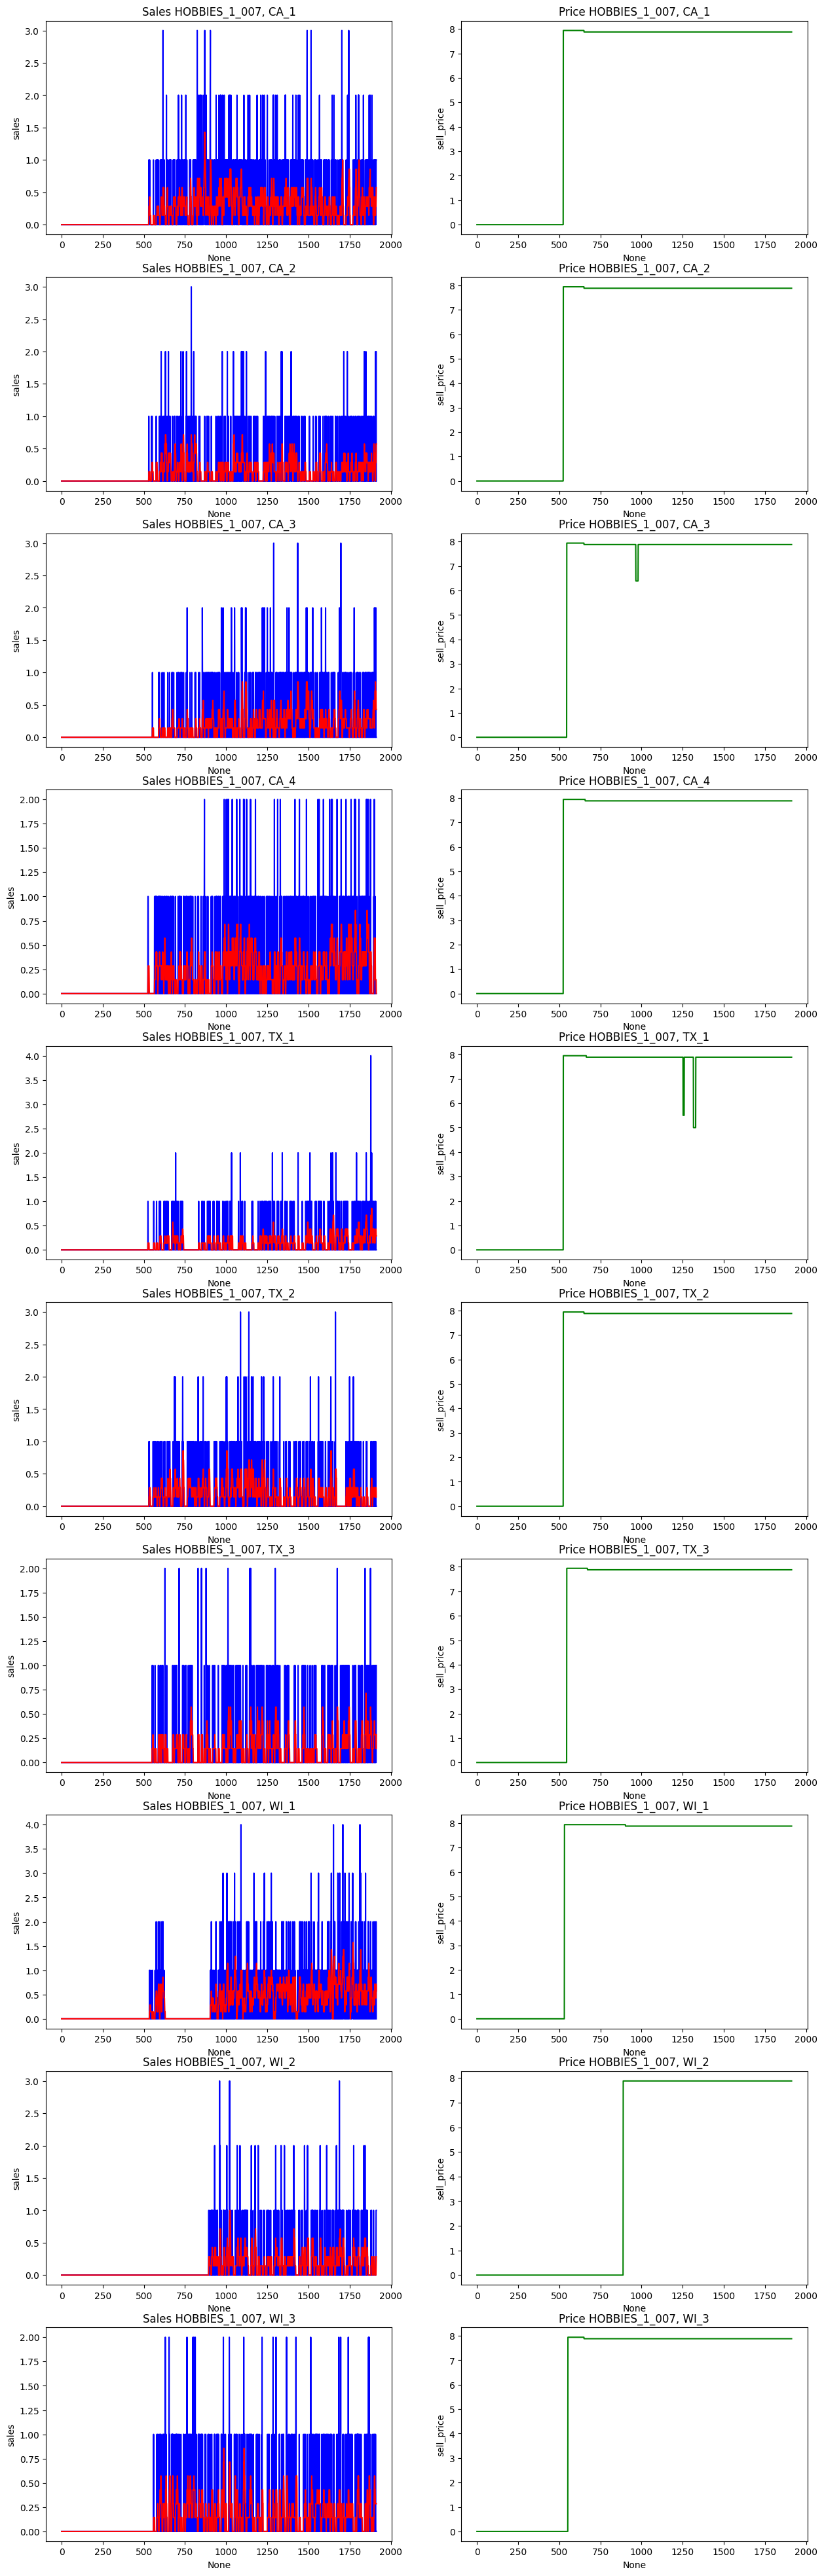

In [65]:
# Sample random ITEM, plot across all stores
id = random.choices(train_validation['item_id'].unique(), k=1)[0]
id = 'HOBBIES_1_007'

ncols = 2
nrows = 10
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,nrows*5))
axs = axs.flatten()

for i, store in enumerate(train_validation['store_id'].unique()):
    # get info about id
    full_id = id + '_' + store + '_validation'
    row = train_validation[train_validation['id'] == full_id]
    item_id = id
    store_id = store
    print(full_id)

    # set up sales df
    sales = row.select_dtypes('number').T
    sales.columns = ['sales']
    sales['sales'] = sales['sales'].astype(int)
    sales = sales.merge(calendar[['d', 'wm_yr_wk']], how='left', left_index=True, right_on='d')

    filtered_prices = prices[(prices['item_id'] == item_id) & (prices['store_id'] == store_id)]
    sales = sales.merge(filtered_prices[['wm_yr_wk', 'sell_price']], how='left', on='wm_yr_wk')
    sales = sales.fillna(0)

    sns.lineplot(x=sales.index, y=sales['sales'], color='blue', ax=axs[2*i])
    sns.lineplot(x=sales.index, y=sales['sales'].rolling(7, min_periods=1).mean(), color='red', ax=axs[2*i])
    sns.lineplot(x=sales.index, y=sales['sell_price'], color='green', ax=axs[2*i+1])
    axs[2*i].set_title(f'Sales {item_id}, {store_id}')
    axs[2*i+1].set_title(f'Price {item_id}, {store_id}')

In [ ]:
prices.groupby(['store_id   ', 'item_id']).size().value_counts().head(20)

282    10932
281     1043
280      544
277      301
279      280
276      267
192      252
217      242
278      234
216      223
225      212
275      203
224      196
230      194
273      192
228      188
271      186
272      184
121      182
174      176
Name: count, dtype: int64